# Zadanie: Fashion-Mnist

Pierwszym krokiem będzie zaimplementowanie sieci neuronowej na używanym wcześniej zestawie Fashion-Mnist tak, aby uzyskać wynik na danych testowych rzędu accuracy > 0.94 (albo jak najbardziej zbliżony), używając poniższego podziału:

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

Drugim krokiem będzie zapisanie i dostarczenie modelu oraz napisanie interfejsu, który przyjmuje wartość wejściową oraz zwraca wartość przewidzianą przez nasz model wraz z wyrysowanym obrazem wejściowym (aby można było zweryfikować wizualnie, czy działa).

W kursie nie mówiliśmy jak tego dokonać, choć zapisywanie modeli jest opisane na stronie TensorFlow. Mentorzy z chęcią pomogą, lecz zachęcamy do odkrycia, jak to zrobić samemu.

Trzecim krokiem będzie podbicie naszego wyniku do około 0.97 poprzez użycie technik augumentacji, czyli tworzenia nowy danych na bazie danych już istniejących. Jest to przydatna technika, o którą pytanie pojawia się podczas rozmów o pracę :)

Będzie to relatywnie trudne, gdyż posiadamy mało danych treningowych, więc należy zrobić mały "research" w poszukiwaniu informacji, jak takie dane sobie wygenerować.

Polecamy szczególnie:

- Albumentation library
- Open CV library

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7462 - loss: 0.7067 - val_accuracy: 0.8808 - val_loss: 0.3345
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8702 - loss: 0.3551 - val_accuracy: 0.8860 - val_loss: 0.3069
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8921 - loss: 0.2954 - val_accuracy: 0.8962 - val_loss: 0.2842
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8999 - loss: 0.2695 - val_accuracy: 0.9020 - val_loss: 0.2639
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9132 - loss: 0.2352 - val_accuracy: 0.9060 - val_loss: 0.2461
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9181 - loss: 0.2196 - val_accuracy: 0.9118 - val_loss: 0.2386
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9263 - loss: 0.2022 - val_accuracy: 0.9120 - val_loss: 0.2411
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9270 - loss: 0.1888 - val_accurac

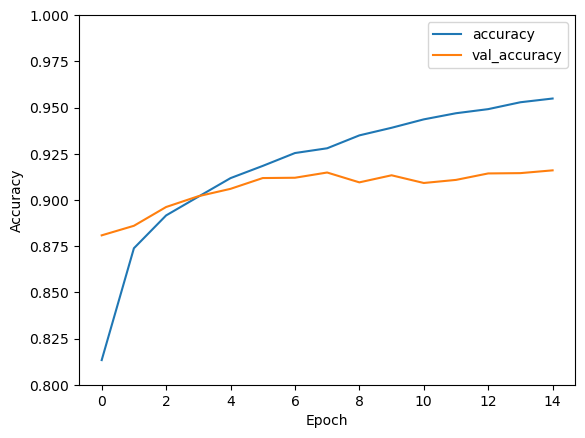

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Wczytanie danych
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizacja i reshape
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Podział danych
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, 
    test_size=0.1, 
    random_state=10, 
    stratify=train_labels
)

# Budowa modelu CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Kompilacja
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Trenowanie
history = model.fit(X_train, y_train, 
                    epochs=15,
                    validation_data=(X_val, y_val))

# Ocena
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nDokładność na zbiorze testowym: {test_acc:.4f}')

# Wykresy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


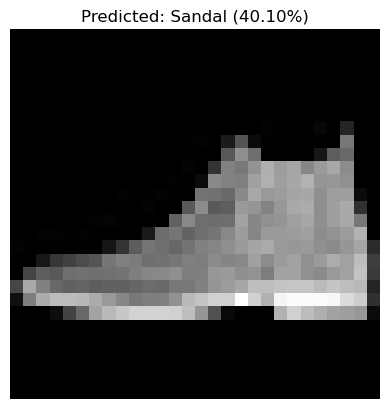

5

In [4]:
# Zapis modelu
model.save('fashion_mnist_model.h5')

# Interfejs predykcyjny
def predict_and_visualize(model_path, image):
    model = tf.keras.models.load_model(model_path)
    
    # Przygotowanie obrazu
    if image.ndim == 2:
        image = np.expand_dims(image, axis=-1)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    
    # Predykcja
    pred = model.predict(image)
    class_idx = np.argmax(pred[0])
    
    # Etykiety klas
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    # Wizualizacja
    plt.imshow(image[0,:,:,0], cmap='gray')
    plt.title(f'Predicted: {class_names[class_idx]} ({100*np.max(pred):.2f}%)')
    plt.axis('off')
    plt.show()
    
    return class_idx

# Przykład użycia
sample_image = test_images[0]
predict_and_visualize('fashion_mnist_model.h5', sample_image)

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 1. Wczytanie i przygotowanie danych
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizacja i reshape
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Podział danych
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, 
    test_size=0.1, 
    random_state=10, 
    stratify=train_labels
)

# 2. Definicja modelu
improved_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# 3. Kompilacja modelu
improved_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Augmentacja danych
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

# 5. Trenowanie
history = improved_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
    ]
)

# 6. Ocena
test_loss, test_acc = improved_model.evaluate(test_images, test_labels)
print(f'\nDokładność na zbiorze testowym: {test_acc:.4f}')

# 7. Zapis modelu
improved_model.save('fashion_mnist_improved.h5')

Epoch 1/50


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


843/843 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.1031 - loss: 2.3089 - val_accuracy: 0.1000 - val_loss: 264.8591 - learning_rate: 1.0000e-04
Epoch 2/50
  1/843 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.0781 - loss: 2.3029

C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


843/843 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.0781 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 266.9742 - learning_rate: 1.0000e-04
Epoch 3/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.1008 - loss: 2.3056 - val_accuracy: 0.1643 - val_loss: 262.4688 - learning_rate: 1.0000e-04
Epoch 4/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.0625 - loss: 2.3031 - val_accuracy: 0.1637 - val_loss: 265.0847 - learning_rate: 1.0000e-04
Epoch 5/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.0972 - loss: 2.3038 - val_accuracy: 0.1920 - val_loss: 77.5521 - learning_rate: 1.0000e-04
Epoch 6/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.0781 - loss: 2.3023 - val_accuracy: 0.1920 - val_loss: 78.1298 - learning_rate: 1.0000e-04
Epoch 7/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.0996 - loss: 2.3029 - val_accuracy: 0.0875 - val_loss: 94.1636 - learning_rate: 1.0000e-04
Epoch 8/50
843/843 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step 


Dokładność na zbiorze testowym: 0.1173


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Wczytanie i przygotowanie danych
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizacja i reshape
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# 2. Generator danych
datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    zoom_range=0.08,
    brightness_range=[0.9, 1.1],
    fill_mode='constant',
    cval=0.0
)

# 3. Budowa modelu
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# 4. Kompilacja
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

# 6. Trening
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    steps_per_epoch=len(train_images) // 64,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop]
)

# 7. Ocena
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nDokładność na zbiorze testowym: {test_acc:.4f}')

Epoch 1/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.0982 - loss: 2.3543 - val_accuracy: 0.0997 - val_loss: 513.3295
Epoch 2/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.1250 - loss: 2.3035 - val_accuracy: 0.0997 - val_loss: 517.4174
Epoch 3/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.0973 - loss: 2.3300 - val_accuracy: 0.1582 - val_loss: 161.6875
Epoch 4/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.1094 - loss: 2.3018 - val_accuracy: 0.1579 - val_loss: 163.6642
Epoch 5/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.1014 - loss: 2.3295 - val_accuracy: 0.1982 - val_loss: 181.5054
Epoch 6/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.0625 - loss: 2.3073 - val_accuracy: 0.1984 - val_loss: 182.3835
Epoch 7/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.0998 - loss: 2.3078 - val_accuracy: 0.1861 - val_loss: 57.5765
Epoch 8/100
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.0

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7365 - loss: 0.7628 - val_accuracy: 0.8671 - val_loss: 0.3787
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8684 - loss: 0.3635 - val_accuracy: 0.8719 - val_loss: 0.3493
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8877 - loss: 0.3084 - val_accuracy: 0.8903 - val_loss: 0.3047
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8997 - loss: 0.2735 - val_accuracy: 0.8932 - val_loss: 0.2877
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9120 - loss: 0.2408 - val_accuracy: 0.9008 - val_loss: 0.2727
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9165 - loss: 0.2266 - val_accuracy: 0.9084 - val_loss: 0.2572
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9242 - loss: 0.2073 - val_accuracy: 0.9100 - val_loss: 0.2516
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9316 - loss: 0.1902 - val_accuracy: 0.

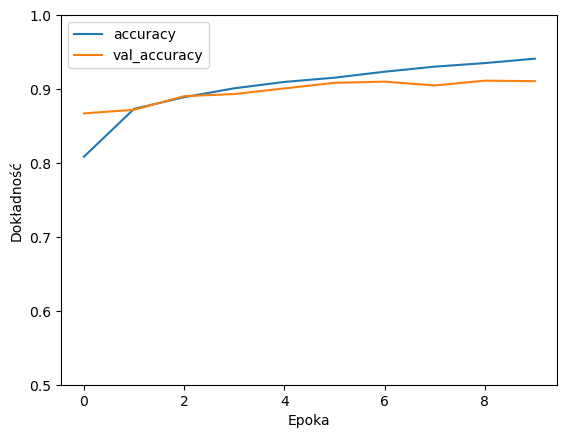

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Wczytanie i przygotowanie danych
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# 2. Budowa modelu
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 3. Kompilacja i trening
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=64)

# 4. Ocena
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nDokładność na zbiorze testowym: {test_acc:.4f}')

# 5. Wizualizacja
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Wczytanie danych
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# 2. Przygotowanie danych
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# 3. Definicja callbacków
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

# 4. Augmentacja danych
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# 5. Budowa modelu
improved_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 6. Kompilacja modelu
improved_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Trening
history = improved_model.fit(
    datagen.flow(train_images, train_labels, batch_size=64, subset='training'),
    validation_data=datagen.flow(train_images, train_labels, batch_size=64, subset='validation'),
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)

# 8. Ocena
test_loss, test_acc = improved_model.evaluate(test_images, test_labels)
print(f'\nDokładność na zbiorze testowym: {test_acc:.4f}')

# 9. Zapis modelu
improved_model.save('fashion_mnist_improved.h5')

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.6247 - loss: 1.1329 - val_accuracy: 0.7960 - val_loss: 0.5597 - learning_rate: 5.0000e-04
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.7855 - loss: 0.5799 - val_accuracy: 0.8322 - val_loss: 0.4579 - learning_rate: 5.0000e-04
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8213 - loss: 0.4923 - val_accuracy: 0.8554 - val_loss: 0.3906 - learning_rate: 5.0000e-04
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8337 - loss: 0.4488 - val_accuracy: 0.8667 - val_loss: 0.3716 - learning_rate: 5.0000e-04
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8467 - loss: 0.4195 - val_accuracy: 0.8577 - val_loss: 0.3896 - learning_rate: 5.0000e-04
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8564 - loss: 0.3928 - val_accuracy: 0.8842 - val_loss: 0.3159 - learning_rate: 5.0000e-04
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/ste


Dokładność na zbiorze testowym: 0.9255


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A
import cv2
import numpy as np

# 1. Wczytanie i przygotowanie danych
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizacja i zmiana kształtu
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# 2. Funkcja augmentacji z Albumentations
def augment(image):
    image = (image * 255).astype(np.uint8)  # Konwersja do uint8 dla Albumentations
    transform = A.Compose([
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.ElasticTransform(alpha=1, sigma=25, alpha_affine=25, p=0.2),
        A.CoarseDropout(max_holes=8, max_height=8, max_width=8, fill_value=0, p=0.3),
        A.HorizontalFlip(p=0.5)
    ])
    augmented = transform(image=image.squeeze())  # Usuwanie wymiaru kanału dla Albumentations
    return augmented['image'].reshape(28, 28, 1).astype('float32') / 255.0  # Powrót do float32

# 3. Generator danych z augmentacją
def augment_generator(images, labels, batch_size=128):
    datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1
    )
    for x_batch, y_batch in datagen.flow(images, labels, batch_size=batch_size, shuffle=True):
        # Zastosowanie dodatkowej augmentacji Albumentations
        x_batch_aug = np.array([augment(img) for img in x_batch])
        yield x_batch_aug, y_batch

# 4. Budowa ulepszonego modelu
def build_improved_model():
    model = models.Sequential([
        # Blok 1
        layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),
        
        # Blok 2
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.35),
        
        # Blok 3
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        
        # Warstwy gęste
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.0005,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07
    )
    
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 5. Callbacki
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

model_checkpoint = callbacks.ModelCheckpoint(
    'best_fashion_mnist_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

# 6. Trening modelu
improved_model = build_improved_model()

history = improved_model.fit(
    augment_generator(train_images, train_labels, batch_size=128),
    steps_per_epoch=len(train_images) // 128,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop, reduce_lr, model_checkpoint],
    verbose=1
)

# 7. Ocena najlepszego modelu
best_model = models.load_model('best_fashion_mnist_model.h5')
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f'\nNajlepsza dokładność na zbiorze testowym: {test_acc:.4f}')

# 8. Wizualizacja wyników
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()